In [52]:
import uuid

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from keras.src.callbacks import EarlyStopping
%matplotlib inline
from utils import *

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
# from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import OneHotEncoder # convert to one-hot-encoding
from keras import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [53]:
data = pd.read_csv('../input/chinese/train.csv')
y = data['character']
X = data.drop('character', axis=1)

In [54]:
X_3d = X.values.reshape(-1, 28, 28, 1)

In [55]:
X_3d = X_3d / 255

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_3d, y, test_size=0.99, random_state=2)

In [57]:
def decode_onehot(encoded_vector, feature_names):
    index_ = np.argmax(encoded_vector)
    return feature_names[index_]

In [58]:
one_hot_encoder = OneHotEncoder().fit(y_train.array.reshape(-1,1))
features = one_hot_encoder.categories_[0]
y_train_encoded = one_hot_encoder.transform(y_train.array.reshape(-1,1)).toarray()
y_test_encoded = one_hot_encoder.transform(y_test.array.reshape(-1,1)).toarray()

In [59]:
show_details(features)

type(array): <class 'numpy.ndarray'>
shape: (15,)
dtype: object



四


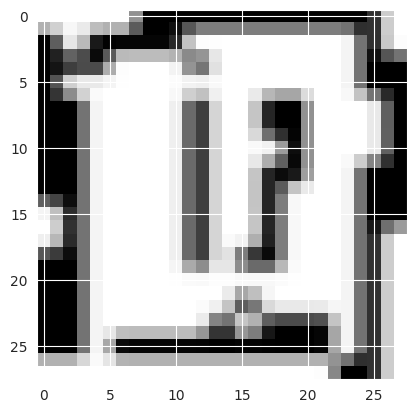

In [60]:
import random

index = random.randint(0, len(y_train_encoded) - 1)

plt.imshow(X_train[index], cmap='Greys')

print(decode_onehot(y_train_encoded[index], features))

In [61]:
model = Sequential()
hidden_layer = load_model('../model/base_model.keras')
hidden_layer.trainable = True
model.add(hidden_layer)
model.add(Dense(len(features), activation='softmax'))

In [62]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
epochs = 100 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [64]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', min_delta=0.001)

In [65]:
X_train.shape

(150, 28, 28, 1)

In [66]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [67]:
history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_encoded),callbacks=[learning_rate_reduction,early_stopping],verbose=2)

Epoch 1/100
2/2 - 2s - loss: 3.1176 - accuracy: 0.0667 - val_loss: 2.6695 - val_accuracy: 0.1345 - lr: 0.0010 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 2s - loss: 2.6613 - accuracy: 0.1133 - val_loss: 2.6475 - val_accuracy: 0.2308 - lr: 0.0010 - 2s/epoch - 906ms/step
Epoch 3/100
2/2 - 2s - loss: 2.6390 - accuracy: 0.1800 - val_loss: 2.6319 - val_accuracy: 0.3106 - lr: 0.0010 - 2s/epoch - 904ms/step
Epoch 4/100
2/2 - 2s - loss: 2.5895 - accuracy: 0.2867 - val_loss: 2.5755 - val_accuracy: 0.4006 - lr: 0.0010 - 2s/epoch - 908ms/step
Epoch 5/100
2/2 - 2s - loss: 2.4606 - accuracy: 0.4467 - val_loss: 2.4307 - val_accuracy: 0.3923 - lr: 0.0010 - 2s/epoch - 932ms/step
Epoch 6/100
2/2 - 2s - loss: 2.3070 - accuracy: 0.3867 - val_loss: 2.2120 - val_accuracy: 0.2921 - lr: 0.0010 - 2s/epoch - 906ms/step
Epoch 7/100
2/2 - 2s - loss: 2.0984 - accuracy: 0.3667 - val_loss: 2.0151 - val_accuracy: 0.2727 - lr: 0.0010 - 2s/epoch - 908ms/step
Epoch 8/100
2/2 - 2s - loss: 1.9018 - accuracy: 0.3800 - val_loss

In [68]:
history = history.history

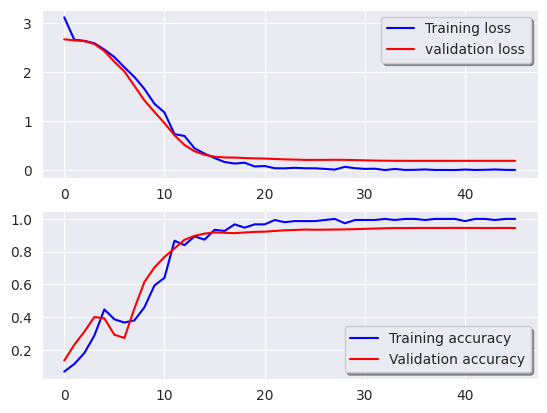

In [69]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history['loss'], color='b', label="Training loss")
ax[0].plot(history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


In [70]:
# identifier = random.randint(0, 100)

In [71]:
# model.save(f'../model/chinese-{identifier}.keras')
# np.save(f'../model/chinese-features-{identifier}.npy', features, allow_pickle=True)